## Preprocess Data

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
from datetime import datetime, date

In [2]:
df = pd.read_csv("C:/Users/wangy51/Documents/Rose-Hulman/2022 Winter/MA384/project/archive/players.csv")
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,5,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee..."
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,5,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ..."
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,3,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']"


In [3]:
#df.dtypes

In [4]:
df['salary_rank'] = pd.qcut(df['int_wage'],q=3,labels=['L','M','H'])
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait,salary_rank
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",H
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ...",H
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']",H


In [5]:
df['salary_rank'].value_counts()

L    8755
H    5683
M    4564
Name: salary_rank, dtype: int64

In [6]:
base_acc = 8755/(8755+5683+4564)

In [7]:
df['salary_rank'] = df['salary_rank'].astype('category')
# df['str_positions'] = df['str_positions'].astype('category')
df['str_best_position'] = df['str_best_position'].astype('category')
df['str_nationality'] = df['str_nationality'].astype('category')
df['str_preferred_foot'] = df['str_preferred_foot'].astype('category')
# df['str_trait'] = df['str_trait'].astype('category')
# df['str_player_speciality'] = df['str_player_speciality'].astype('category')
df['str_body_type'] = df['str_body_type'].astype('category')
df['str_work_rate'] = df['str_work_rate'].astype('category')
df['int_team_id'] = df['int_team_id'].astype('category')
df['int_player_age'] = date.today().year - pd.DatetimeIndex(pd.to_datetime(df['dt_date_of_birth'])).year

In [8]:
df=df.dropna()

In [9]:
X = df.drop(['salary_rank','int_player_id','str_player_name','int_wage','dt_date_of_birth','str_trait','int_player_age', 'str_positions','str_best_position','str_trait','str_player_speciality'],axis=1)

In [10]:
# X = df.drop(['salary_rank','int_player_id','str_player_name','int_wage','dt_date_of_birth','str_trait','int_player_age'],axis=1)
y = df.salary_rank

In [11]:
X.head()

,int_height,int_weight,int_overall_rating,int_potential_rating,int_best_overall_rating,int_value,int_team_id,str_nationality,int_crossing,int_finishing,...,int_weak_foot,int_skill_moves,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control
0,170,72,93,93,93,103500000,5.0,Argentina,85,95,...,4,4,5,Medium/ Low,Unique,96,93,94,91,96
1,187,83,92,92,92,63000000,6.0,Portugal,84,95,...,4,5,5,High/ Low,Unique,88,81,76,77,92
3,181,70,91,91,91,129000000,2.0,Belgium,94,82,...,5,4,4,High/ High,Unique,88,85,83,93,92
4,175,68,91,91,91,132000000,7.0,Brazil,85,87,...,5,5,5,High/ Medium,Unique,95,88,89,81,95
5,184,80,91,91,91,111000000,4.0,Poland,71,94,...,4,4,4,High/ Medium,Unique,85,79,85,70,88


In [12]:
def delete_brac(x):
    return x[1:len(x)-1]

In [13]:
X_ohe = pd.get_dummies(X)
X_ohe = pd.concat([X_ohe,df['str_positions'].str.get_dummies(sep=',')],axis=1)
X_ohe = pd.concat([X_ohe,df['str_trait'].apply(delete_brac).str.get_dummies(sep=',')],axis=1)
X_ohe = pd.concat([X_ohe,df['str_player_speciality'].apply(delete_brac).str.get_dummies(sep=',')],axis=1)
X_ohe

,int_height,int_weight,int_overall_rating,int_potential_rating,int_best_overall_rating,int_value,int_crossing,int_finishing,int_heading_accuracy,int_short_passing,...,'Distance Shooter','Dribbler','Engine','FK Specialist','Playmaker\xa0','Poacher','Speedster','Strength','Tackling\xa0','Tactician\xa0'
0,170,72,93,93,93,103500000,85,95,70,91,...,0,1,0,0,0,0,0,0,0,0
1,187,83,92,92,92,63000000,84,95,90,82,...,0,0,0,0,0,0,0,0,0,0
3,181,70,91,91,91,129000000,94,82,55,94,...,0,1,0,0,0,0,0,0,0,0
4,175,68,91,91,91,132000000,85,87,62,87,...,0,0,0,0,0,0,1,0,0,0
5,184,80,91,91,91,111000000,71,94,87,85,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15423,165,59,60,71,62,550000,35,43,15,61,...,0,0,0,0,0,0,0,0,0,0
15658,182,70,59,82,61,700000,45,59,49,53,...,0,0,0,0,0,0,1,0,0,0
16059,171,68,59,71,60,550000,45,50,37,56,...,0,0,0,0,0,0,0,0,0,0
16283,163,60,58,75,59,525000,52,50,40,50,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree (3 category)

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [16]:
dtreeCV = GridSearchCV(dtree,param_grid=parameters,return_train_score=True,n_jobs=-1)

In [17]:
dtreeCV.fit(X_ohe,y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True)

In [18]:
dtreeCV.best_params_

{'max_depth': 2}

In [19]:
dtreeCV.best_score_

0.6633166702890676

In [20]:
results = pd.DataFrame()
results['depth'] = parameters['max_depth']
results['train'] = dtreeCV.cv_results_['mean_train_score'] # we need to set return_train_score=True to have this data
results['valid'] = dtreeCV.cv_results_['mean_test_score']
results['baseline'] = base_acc
results

,depth,train,valid,baseline
0,1,0.770968,0.652971,0.460741
1,2,0.831075,0.663317,0.460741
2,3,0.847151,0.639165,0.460741
3,4,0.864862,0.647533,0.460741
4,5,0.882802,0.650289,0.460741
5,6,0.904239,0.554040,0.460741
6,7,0.919618,0.561495,0.460741
7,8,0.933599,0.561478,0.460741
8,9,0.947113,0.554040,0.460741
9,10,0.957599,0.553080,0.460741


<AxesSubplot:xlabel='depth'>

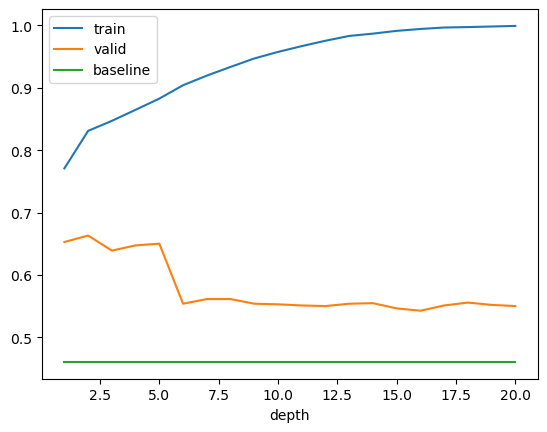

In [21]:
results.plot.line(x='depth', y = ['train','valid','baseline'])

In [22]:
dtree = DecisionTreeClassifier(max_depth=2)

In [23]:
dtree.fit(X_ohe,y)

DecisionTreeClassifier(max_depth=2)

In [24]:
dtree_string = export_text(dtree,
                           feature_names=list(X_ohe.columns),
                           decimals=1,
                           spacing=5)
print(dtree_string)

|----- int_overall_rating <= 70.5
|     |----- int_overall_rating <= 65.5
|     |     |----- class: L
|     |----- int_overall_rating >  65.5
|     |     |----- class: M
|----- int_overall_rating >  70.5
|     |----- int_team_id_86.0 <= 0.5
|     |     |----- class: H
|     |----- int_team_id_86.0 >  0.5
|     |     |----- class: L



Player of overall rating of bellow 65.5 have low wage, player of rating between 65.5 and 70.5 have median wage, player of rating above 70.5 have high wage, with the exception of those in team with id 86, they have low wage.

## Naive Bayes

In [25]:
grid = {'alpha':[0,0.1,0.2,0.3,0.4,0.5]}
nbayes = MultinomialNB()
nbayesCV = GridSearchCV(nbayes, param_grid = grid, return_train_score=True,n_jobs=-1)

In [26]:
nbayesCV.fit(X_ohe,y)

C:\Users\wangy51\Anaconda3\envs\MA384\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True)

In [27]:
results = pd.DataFrame()
results['alpha'] = grid['alpha']
results['train'] = nbayesCV.cv_results_['mean_train_score']
results['valid'] = nbayesCV.cv_results_['mean_test_score']
results['baseline'] = base_acc
results

,alpha,train,valid,baseline
0,0.0,0.600867,0.563212,0.460741
1,0.1,0.595508,0.563212,0.460741
2,0.2,0.595508,0.563212,0.460741
3,0.3,0.595508,0.563212,0.460741
4,0.4,0.595508,0.563212,0.460741
5,0.5,0.595740,0.563212,0.460741


<AxesSubplot:xlabel='alpha'>

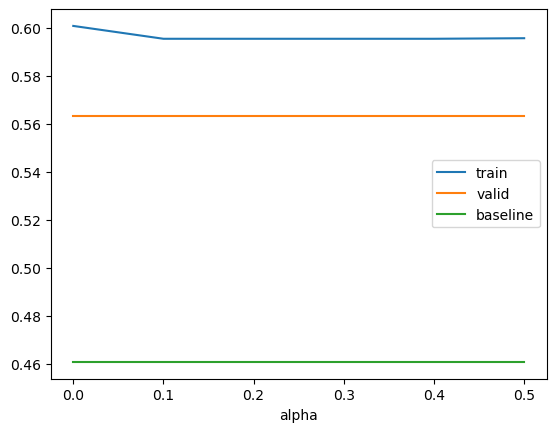

In [28]:
results.plot.line(x='alpha', y = ['train','valid','baseline'])

In [29]:
nbayesCV.best_score_

0.5632123451423603

In [30]:
nbayesCV.best_params_

{'alpha': 0}

In [31]:
nbayes_best = MultinomialNB(alpha=0)

In [32]:
nbayes_best.fit(X_ohe,y)

C:\Users\wangy51\Anaconda3\envs\MA384\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0)

## Decision Tree (2 category)

In [33]:
df = pd.read_csv("C:/Users/wangy51/Documents/Rose-Hulman/2022 Winter/MA384/project/archive/players.csv")
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,5,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee..."
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,5,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ..."
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,3,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']"


In [34]:
df['salary_rank'] = pd.qcut(df['int_wage'],q=2,labels=['L','H'])
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait,salary_rank
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",H
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ...",H
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']",H


In [35]:
df['salary_rank'].value_counts()

L    10575
H     8427
Name: salary_rank, dtype: int64

In [36]:
base_acc = 10575/(10575+8427)
base_acc

0.556520366277234

In [37]:
df['salary_rank'] = df['salary_rank'].astype('category')
# df['str_positions'] = df['str_positions'].astype('category')
df['str_best_position'] = df['str_best_position'].astype('category')
df['str_nationality'] = df['str_nationality'].astype('category')
df['str_preferred_foot'] = df['str_preferred_foot'].astype('category')
# df['str_trait'] = df['str_trait'].astype('category')
# df['str_player_speciality'] = df['str_player_speciality'].astype('category')
df['str_body_type'] = df['str_body_type'].astype('category')
df['str_work_rate'] = df['str_work_rate'].astype('category')
df['int_team_id'] = df['int_team_id'].astype('category')
df['int_player_age'] = date.today().year - pd.DatetimeIndex(pd.to_datetime(df['dt_date_of_birth'])).year

In [38]:
df=df.dropna()

In [39]:
X = df.drop(['salary_rank','int_player_id','str_player_name','int_wage','dt_date_of_birth','str_trait','str_positions','str_best_position','str_trait','str_player_speciality'],axis=1)
#X = df.drop(['salary_rank','int_player_id','str_player_name','int_wage','dt_date_of_birth','str_trait','int_player_age'],axis=1)
y = df.salary_rank

In [40]:
def delete_brac(x):
    return x[1:len(x)-1]

In [41]:
X_ohe = pd.get_dummies(X)
X_ohe = pd.concat([X_ohe,df['str_positions'].str.get_dummies(sep=',')],axis=1)
X_ohe = pd.concat([X_ohe,df['str_trait'].apply(delete_brac).str.get_dummies(sep=',')],axis=1)
X_ohe = pd.concat([X_ohe,df['str_player_speciality'].apply(delete_brac).str.get_dummies(sep=',')],axis=1)
X_ohe

,int_height,int_weight,int_overall_rating,int_potential_rating,int_best_overall_rating,int_value,int_crossing,int_finishing,int_heading_accuracy,int_short_passing,...,'Distance Shooter','Dribbler','Engine','FK Specialist','Playmaker\xa0','Poacher','Speedster','Strength','Tackling\xa0','Tactician\xa0'
0,170,72,93,93,93,103500000,85,95,70,91,...,0,1,0,0,0,0,0,0,0,0
1,187,83,92,92,92,63000000,84,95,90,82,...,0,0,0,0,0,0,0,0,0,0
3,181,70,91,91,91,129000000,94,82,55,94,...,0,1,0,0,0,0,0,0,0,0
4,175,68,91,91,91,132000000,85,87,62,87,...,0,0,0,0,0,0,1,0,0,0
5,184,80,91,91,91,111000000,71,94,87,85,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15423,165,59,60,71,62,550000,35,43,15,61,...,0,0,0,0,0,0,0,0,0,0
15658,182,70,59,82,61,700000,45,59,49,53,...,0,0,0,0,0,0,1,0,0,0
16059,171,68,59,71,60,550000,45,50,37,56,...,0,0,0,0,0,0,0,0,0,0
16283,163,60,58,75,59,525000,52,50,40,50,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dtree = DecisionTreeClassifier()
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
dtreeCV = GridSearchCV(dtree,param_grid=parameters,return_train_score=True,n_jobs=-1)

In [43]:
dtreeCV.fit(X_ohe,y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True)

In [44]:
dtreeCV.best_params_

{'max_depth': 2}

In [45]:
dtreeCV.best_score_

0.7798652466855032

In [46]:
results = pd.DataFrame()
results['depth'] = parameters['max_depth']
results['train'] = dtreeCV.cv_results_['mean_train_score'] # we need to set return_train_score=True to have this data
results['valid'] = dtreeCV.cv_results_['mean_test_score']
results['baseline'] = base_acc
results

,depth,train,valid,baseline
0,1,0.909598,0.778005,0.55652
1,2,0.912394,0.779865,0.55652
2,3,0.924975,0.501143,0.55652
3,4,0.934526,0.499265,0.55652
4,5,0.946411,0.502995,0.55652
5,6,0.956896,0.491789,0.55652
6,7,0.965750,0.495527,0.55652
7,8,0.972040,0.502056,0.55652
8,9,0.978331,0.499257,0.55652
9,10,0.982992,0.501126,0.55652


<AxesSubplot:xlabel='depth'>

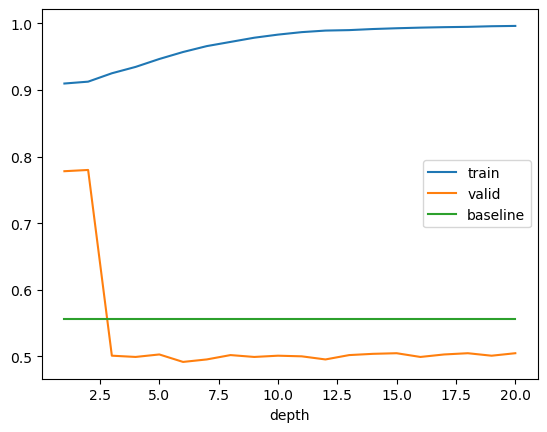

In [47]:
results.plot.line(x='depth', y = ['train','valid','baseline'])

In [48]:
dtree = DecisionTreeClassifier(max_depth=2)

In [49]:
dtree.fit(X_ohe,y)

DecisionTreeClassifier(max_depth=2)

In [50]:
dtree_string = export_text(dtree,
                           feature_names=list(X_ohe.columns),
                           decimals=1,
                           spacing=5)
print(dtree_string)

|----- int_overall_rating <= 67.5
|     |----- int_overall_rating <= 65.5
|     |     |----- class: L
|     |----- int_overall_rating >  65.5
|     |     |----- class: L
|----- int_overall_rating >  67.5
|     |----- int_team_id_86.0 <= 0.5
|     |     |----- class: H
|     |----- int_team_id_86.0 >  0.5
|     |     |----- class: L



Similary result with the 3 category one, team with id 86 have outlining effect on wage

# For over_all_rating